# **Importing Libraries**

In [ ]:
!pip install scikeras --quiet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import tensorflow as tf
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

# **Data Exploration**

In [ ]:
df = pd.read_csv('/content/Anxiety Level in Healthcare Workers Dataset-2 - ML SHEET_PROJECT7.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Timestamp                   221 non-null    object
 1   Name                        221 non-null    object
 2   Gender                      221 non-null    int64 
 3   Martial Status              221 non-null    int64 
 4   Age                         221 non-null    int64 
 5   Education                   221 non-null    int64 
 6   Role in healthcare workers  221 non-null    int64 
 7   Working Hours               221 non-null    int64 
 8   Location                    221 non-null    int64 
 9   Income                      221 non-null    int64 
 10  ANXIETY SCORE               221 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 19.1+ KB


In [ ]:
df.head()

,Timestamp,Name,Gender,Martial Status,Age,Education,Role in healthcare workers,Working Hours,Location,Income,ANXIETY SCORE
0,11-13-2021 13:44:48,GUNDIKAYALA JYOSTHNA,1,1,1,7,4,0,2,2,3
1,11-13-2021 14:28:11,M SANDHYA RANI,1,1,1,7,4,0,2,1,5
2,11-13-2021 15:40:48,G. SAHITYA,1,1,1,7,4,0,2,1,20
3,11-14-2021 12:15:26,S.nagendra babu,0,1,1,3,2,0,2,1,11
4,11-16-2021 22:15:26,Manaswitha Bheemavarapu,1,1,1,6,6,2,1,1,13


## **Feature Engineering**

In [ ]:
def anxiety_class(score):
  if 0 <= score <= 4:
    return 'Minimal'
  elif 5<= score <= 9:
    return 'Mild'
  elif 10<= score <= 14:
    return 'Moderate'
  elif 15<= score <= 21:
    return 'Severe'

In [ ]:
df['anxiety_level'] = df['ANXIETY SCORE'].apply(anxiety_class)

In [ ]:
df

,Timestamp,Name,Gender,Martial Status,Age,Education,Role in healthcare workers,Working Hours,Location,Income,ANXIETY SCORE,anxiety_level
0,11-13-2021 13:44:48,GUNDIKAYALA JYOSTHNA,1,1,1,7,4,0,2,2,3,Minimal
1,11-13-2021 14:28:11,M SANDHYA RANI,1,1,1,7,4,0,2,1,5,Mild
2,11-13-2021 15:40:48,G. SAHITYA,1,1,1,7,4,0,2,1,20,Severe
3,11-14-2021 12:15:26,S.nagendra babu,0,1,1,3,2,0,2,1,11,Moderate
4,11-16-2021 22:15:26,Manaswitha Bheemavarapu,1,1,1,6,6,2,1,1,13,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
216,01-03-2022 20:08,Sravani,1,0,2,1,0,1,0,0,2,Minimal
217,01-03-2022 20:09,Asma,1,0,1,2,5,1,0,0,4,Minimal
218,01-03-2022 20:11,Krishna reddy,0,0,2,6,6,2,0,3,3,Minimal
219,01-03-2022 20:13,sahastra,1,0,1,1,0,1,0,0,2,Minimal


<Axes: >

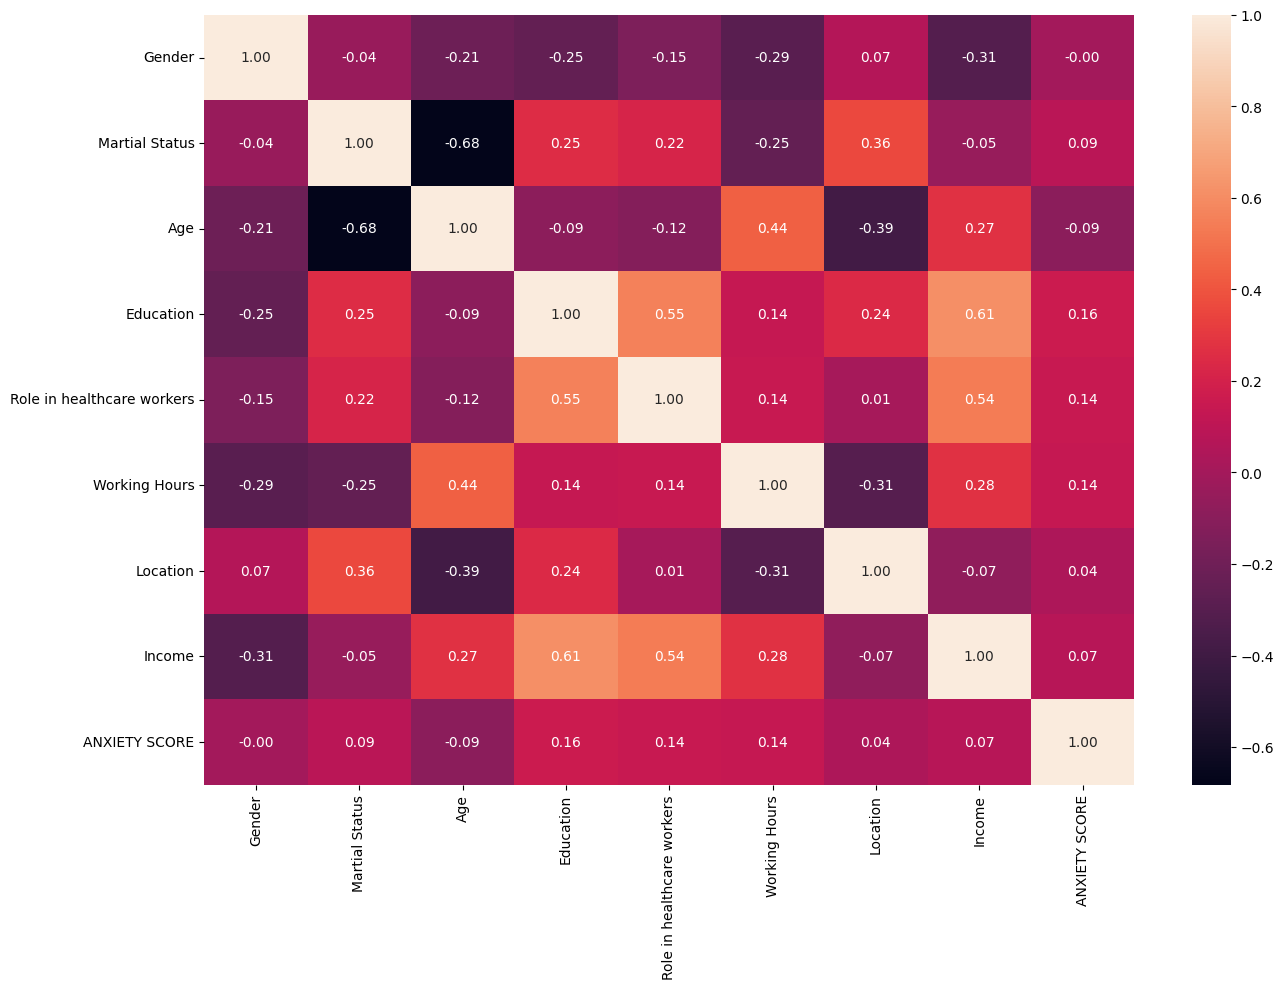

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.drop(columns=['Timestamp', 'Name', 'anxiety_level']).corr(),
            annot= True, fmt = '.2f')

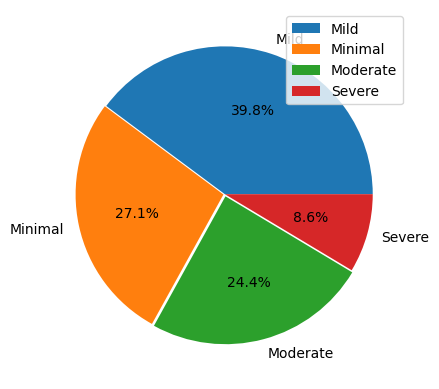

In [ ]:
plt.pie(df['anxiety_level'].value_counts(),
        labels = df['anxiety_level'].value_counts().index,
        explode = [0,0.01,0.015,0],
        autopct='%1.1f%%')
plt.legend()

### **Data Imbalance Handling**

>Given that we have a small dataset with only 221 entries and Severe anxiety cases account for only 8%, it is important to handle the imbalance carefully, as overly aggressive resampling techniques might lead to overfitting or loss of important data.

>> **SMOTE (Synthetic Minority Over-sampling Technique)** generates synthetic samples for the minority class by interpolating between existing samples rather than simply duplicating them. This helps avoid overfitting while balancing the classes.

In [ ]:
X = df.iloc[:, 2:10]
y = df['anxiety_level']

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state= 10)
X_resampled, y_resampled = smote.fit_resample(X, y)

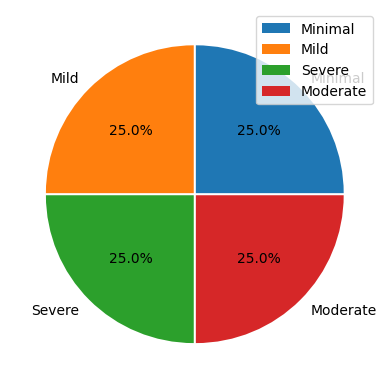

In [ ]:
plt.pie(y_resampled.value_counts(),
        labels = y_resampled.value_counts().index,
        explode = [0.01,0.01,0.01,0.01],
        autopct='%1.1f%%')
plt.legend()

In [ ]:
len(X), len(X_resampled), len(y), len(y_resampled)

(221, 352, 221, 352)

In [ ]:
y_resampled.value_counts()

,count
anxiety_level,
Minimal,88
Mild,88
Severe,88
Moderate,88


In [ ]:
le = LabelEncoder()
y = le.fit_transform(y_resampled)

In [ ]:
X = X_resampled

# Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                   random_state=10)

# **Predictive Modelling**

> 1. Setting up custom ANN

In [ ]:
def custom_ann(input_dim):
  ann_model = Sequential([
        Dense(64, activation='relu', input_dim= input_dim),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')
    ])
  ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return ann_model
input_dim = X_train.shape[1]

> 2. Extablishing Pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

param_grid = [
    # Logistic Regression
    {'classifier': [LogisticRegression(max_iter=1000)],
     'classifier__C': np.logspace(-3, 3, 15),
     'classifier__penalty': ['l1', 'l2'],
     'classifier__solver': ['liblinear']},

    # Support Vector Classifier (SVC)
    {'classifier': [SVC()],
     'classifier__C': np.logspace(-4, 4, 15),
     'classifier__kernel': ['poly', 'rbf'],
     'classifier__coef0': [0.0, 1.0]},

    #K-Nearest Neighbors
    {'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': [3, 5, 7, 9, 11],
     'classifier__weights': ['uniform', 'distance'],
     'classifier__metric': ['euclidean', 'manhattan'],
     'classifier__algorithm': ['ball_tree', 'kd_tree', 'brute']},

    # Naive Bayes
    {'classifier': [GaussianNB()],
     'classifier__var_smoothing': [1e-8, 1e-7, 1e-9, 1e-10, 1e-11]},

    # Random Forest Classifier
    {'classifier': [RandomForestClassifier()],
     'classifier__n_estimators': [50, 100],
     'classifier__max_depth': [None, 10, 20]},

    # XGBoost Classifier
    {'classifier': [XGBClassifier()],
     'classifier__n_estimators': [50, 100],
     'classifier__learning_rate': [0.1, 0.2, 0.3],
     'classifier__max_depth': [6, 8, 10],
     'classifier__subsample': [0.8, 0.9]},

    # ANN Classifier (Keras)
    {'classifier': [KerasClassifier(model= custom_ann, input_dim=input_dim, verbose=1)],
     'classifier__epochs': [64, 100],
     'classifier__batch_size': [15, 30]},
]

> 3. Fitting Models & Recording Best Estimators for Each Model

In [ ]:
results = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Test Accuracy', 'Precision Score', 'Recall Score', 'F1 Score'])

for params in param_grid:
  # setup Pipeline with the current Classifier
  pipeline.set_params(**{k: v[0] for k, v in params.items()})
  grid_search = GridSearchCV(pipeline, param_grid= [params], cv=10, scoring='accuracy', n_jobs=-1)
  grid_search.fit(X_train, y_train)

  # extracting the best metrics and evaluating current Classifier
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X_test)
  train_acc = best_model.score(X_train, y_train)*100
  test_acc = best_model.score(X_test, y_test)*100
  model_precision = precision_score(y_test, y_pred, average='micro')
  model_recall = recall_score(y_test, y_pred, average='micro')
  model_f1 = f1_score(y_test,y_pred, average='micro')

  # recording findings into a temporary df
  temp_df = pd.DataFrame({
        'Model': [type(best_model.named_steps['classifier']).__name__],
        'Training Accuracy': [round(train_acc, 2)],
        'Test Accuracy': [round(test_acc, 2)],
        'Precision Score': [round(model_precision, 4)],
        'Recall Score': [round(model_recall, 4)],
        'F1 Score': [round(model_f1, 4)]
    })

  #finalising entry into the findings df
  results = pd.concat([results, temp_df], ignore_index=True)

<ipython-input-27-13c0382215f3>:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, temp_df], ignore_index=True)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.2553 - loss: 1.3923
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3859 - loss: 1.2929 
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4976 - loss: 1.2337 
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4423 - loss: 1.2123 
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5223 - loss: 1.1489 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6007 - loss: 1.0616 
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5779 - loss: 1.0545 
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5955 - loss: 1.0262 
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4838 - loss: 1.0890 
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5896 - loss: 0.9764 
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6037 - loss: 0.9700 
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

# **Final Result**

In [ ]:
results

,Model,Training Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,LogisticRegression,47.33,46.48,0.4648,0.4648,0.4648
1,SVC,90.39,64.79,0.6479,0.6479,0.6479
2,KNeighborsClassifier,92.17,52.11,0.5211,0.5211,0.5211
3,GaussianNB,46.26,46.48,0.4648,0.4648,0.4648
4,RandomForestClassifier,92.17,47.89,0.4789,0.4789,0.4789
5,XGBClassifier,89.32,50.70,0.5070,0.5070,0.5070
6,KerasClassifier,89.68,56.34,0.5634,0.5634,0.5634
